In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from scipy import stats
from scipy.stats.mstats import winsorize
from math import sqrt
from sklearn.metrics import mean_squared_error


import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")
df = df.copy()
pd.set_option('display.max_columns', 100)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
numeric_df = df.select_dtypes(include='number')
columns_with_min_zero = [col for col in numeric_df.columns if numeric_df[col].min() == 0]
value_counts = {col: numeric_df[col].value_counts() for col in columns_with_min_zero}

# Print the value counts for each selected column
for col, counts in value_counts.items():
    print(f"Value counts for column '{col}':")
    print(counts)
    print()

Value counts for column 'MasVnrArea':
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

Value counts for column 'BsmtFinSF1':
BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

Value counts for column 'BsmtFinSF2':
BsmtFinSF2
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: count, Length: 144, dtype: int64

Value counts for column 'BsmtUnfSF':
BsmtUnfSF
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: count, Length: 780, dtype: int64

Value counts for column 'TotalBsmtSF':
TotalBsmtSF
0       37
864     35
672     17
912     15
1

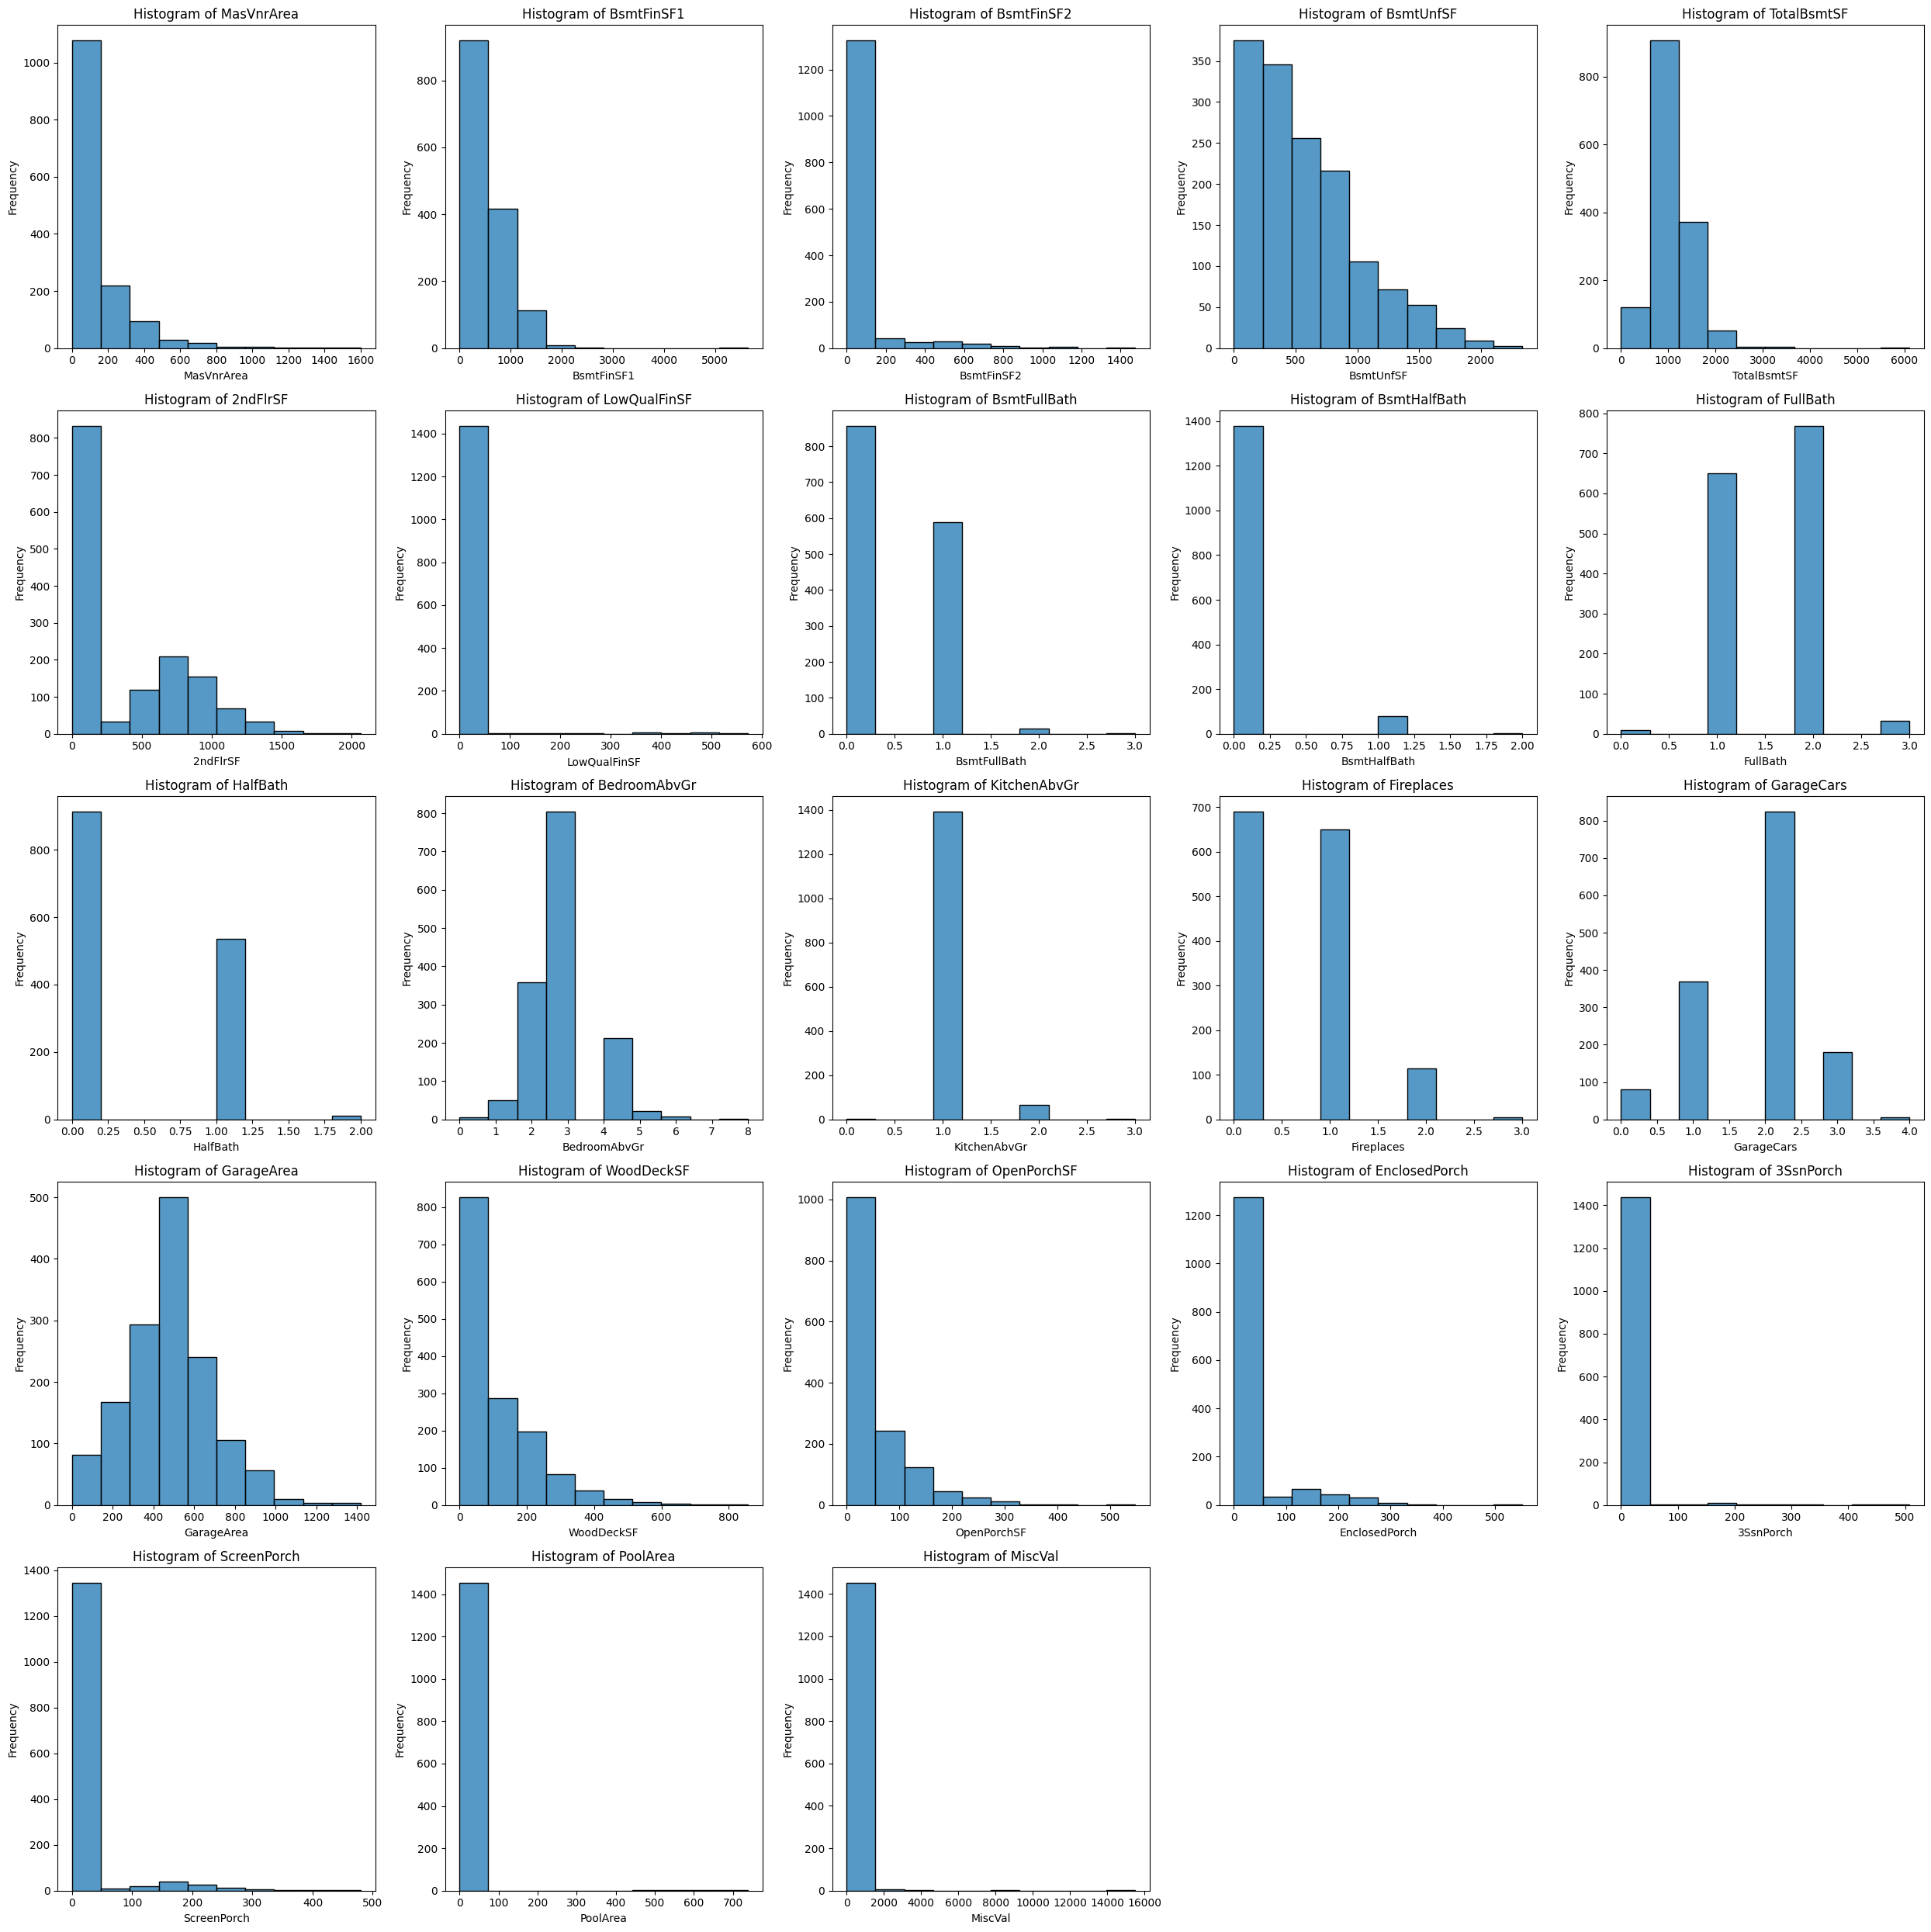

In [8]:
num_cols = len(columns_with_min_zero)
grid_size = math.ceil(math.sqrt(num_cols))


fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(5 * grid_size, 5 * grid_size))
axes = axes.flatten()

for i, col in enumerate(columns_with_min_zero):
    sns.histplot(numeric_df[col], bins=10, kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for i in range(len(columns_with_min_zero), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [9]:
import plotly.graph_objects as go
import plotly.express as px

# Assuming df is your DataFrame
df_sorted_years = df.sort_values('YearBuilt')
years = df_sorted_years['YearBuilt'].unique()

fig = go.Figure()

# Use a color palette from Plotly Express
colors = px.colors.qualitative.Set3

for i, year in enumerate(years):
    filtered_df = df_sorted_years[df_sorted_years['YearBuilt'] == year]
    fig.add_trace(go.Box(
        x=filtered_df['YearBuilt'],
        y=filtered_df['SalePrice'],
        name=str(year),
        visible=True,
        marker_color=colors[i % len(colors)]
    ))

fig.update_layout(
    sliders=[{
        'currentvalue': {"prefix": "Year: "},
        'steps': [
            {'label': str(year), 'method': 'update', 'args': [{'visible': [y == year for y in years]}]}
            for year in years
        ]
    }],
    yaxis=dict(range=[-100, 800000], autorange=False),
    xaxis=dict(tickangle=-90, autorange=True),
    width=1000,
    height=400
)

fig.show()


In [10]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1000 with 0 Axes>

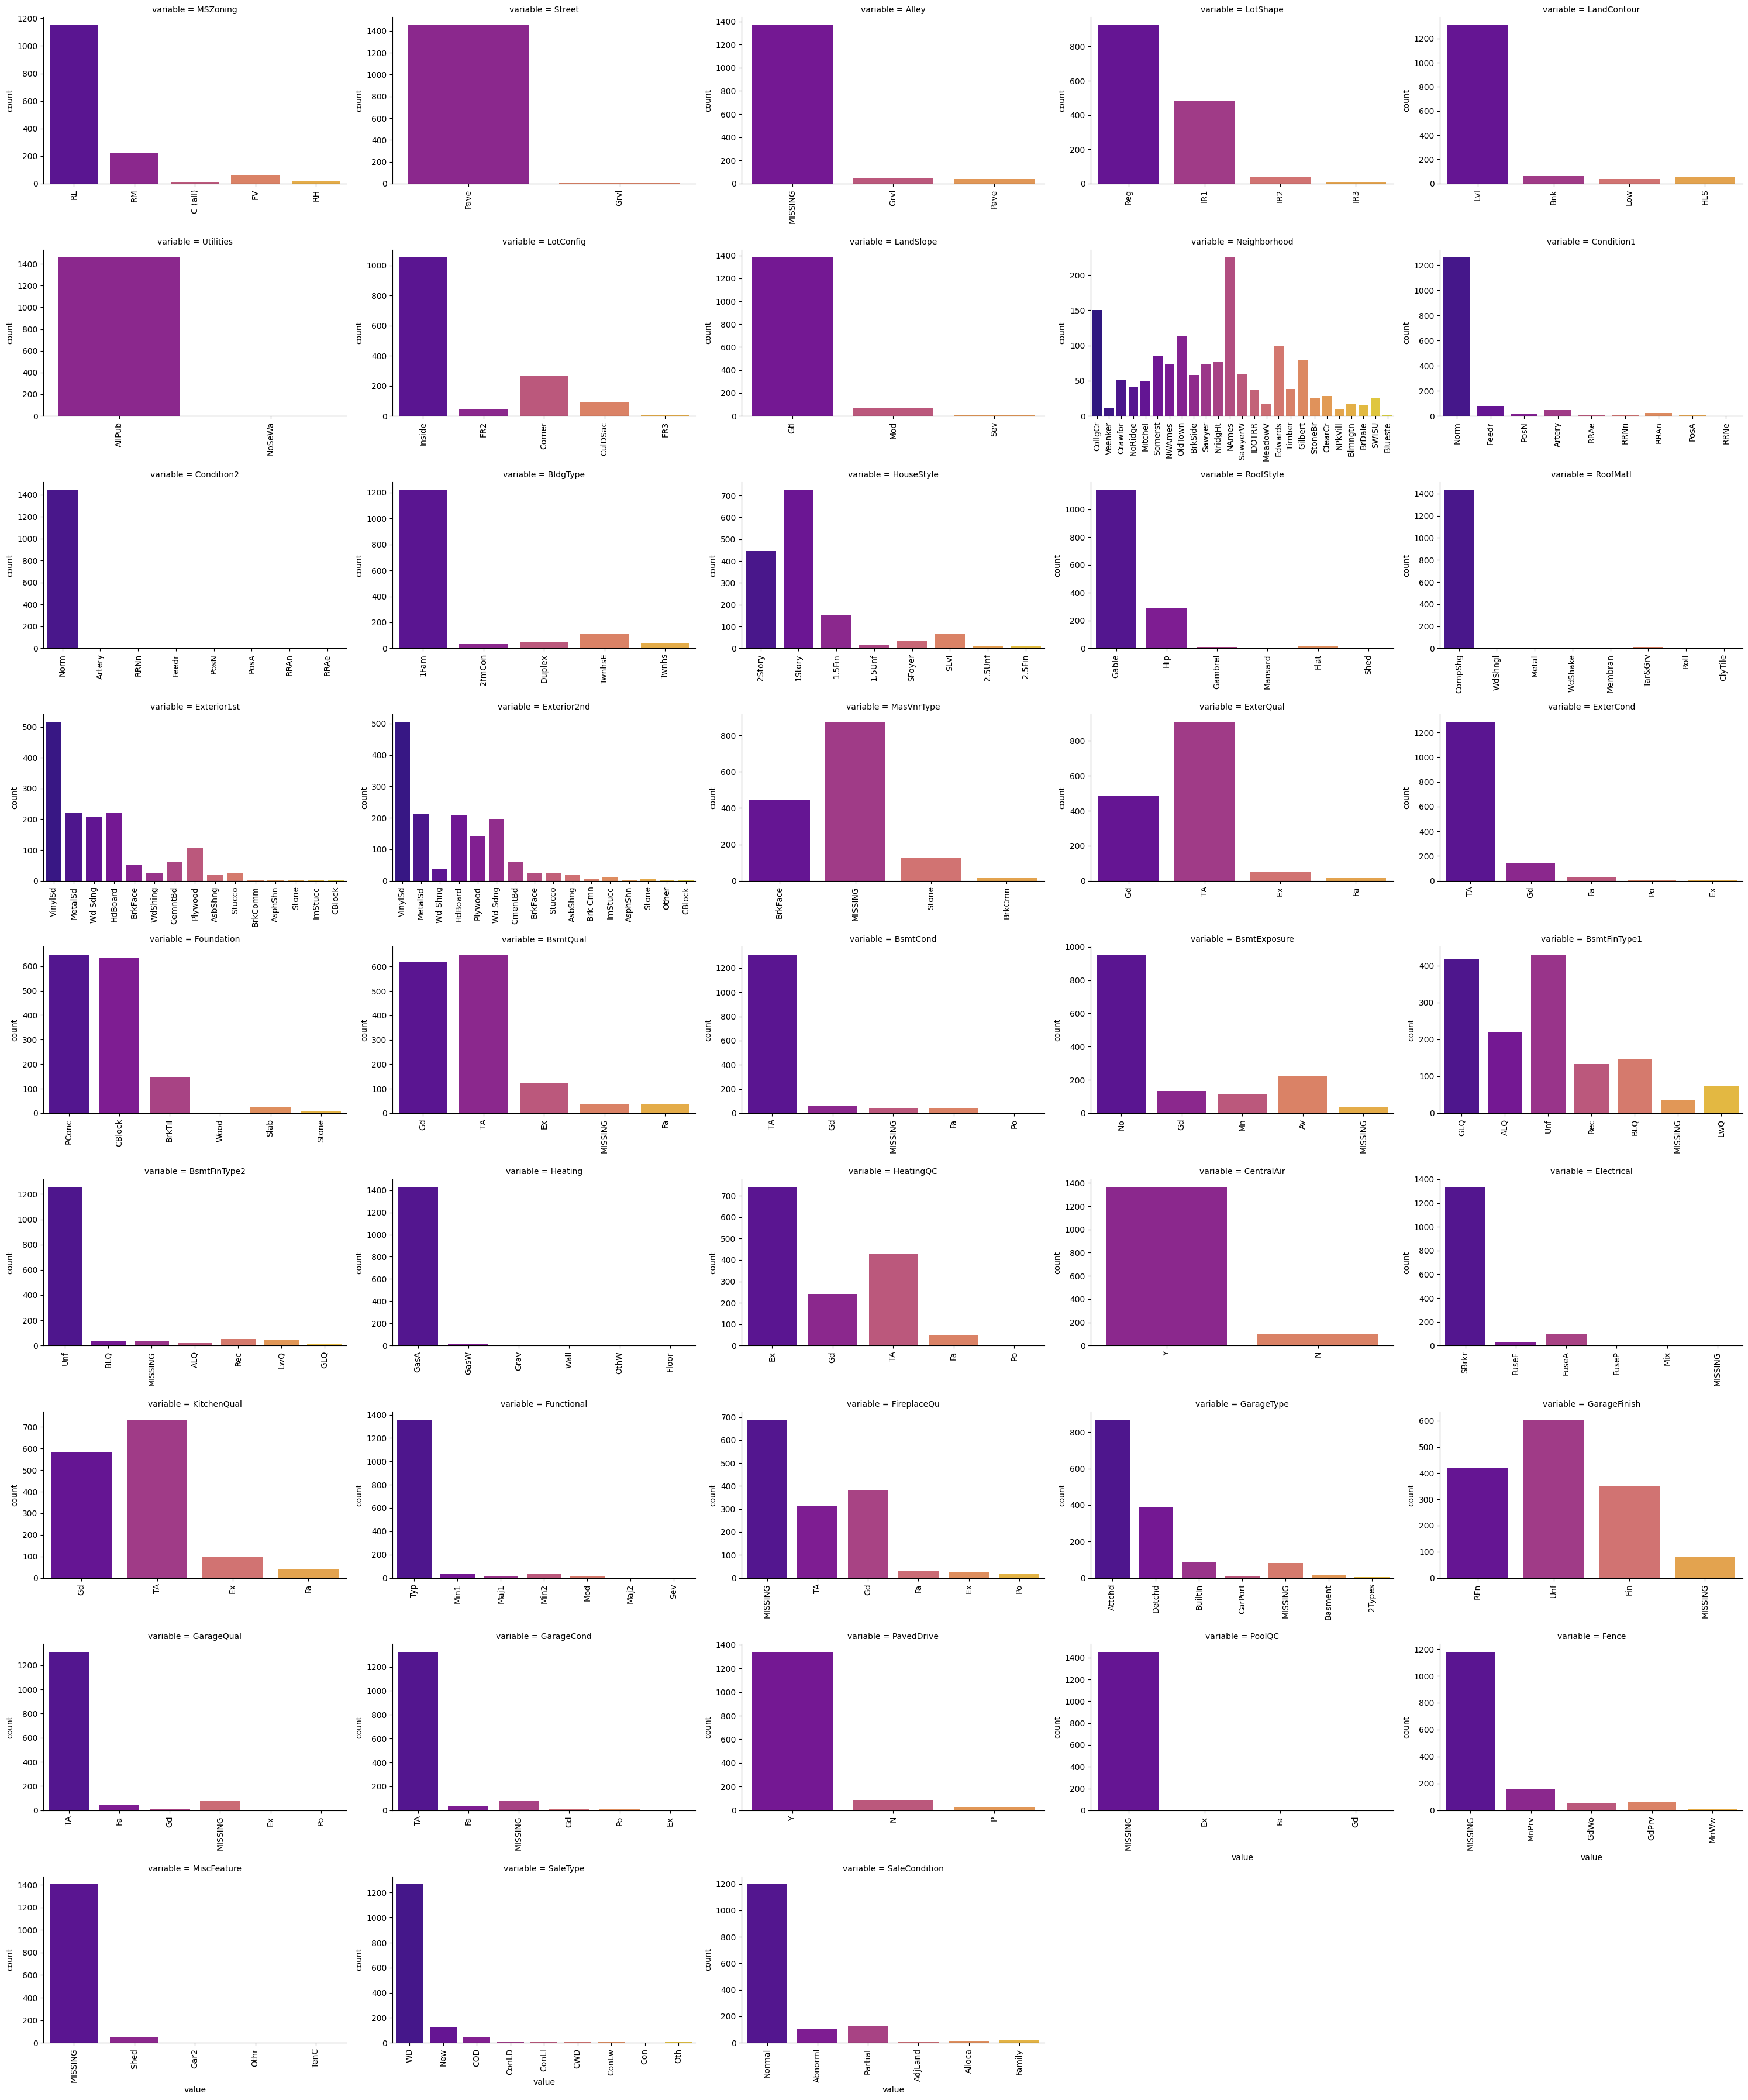

In [11]:
dfc = df.copy()

for c in qualitative:
    dfc[c] = dfc[c].astype('category')
    if dfc[c].isnull().any():
        dfc[c] = dfc[c].cat.add_categories(['MISSING'])
        dfc[c] = dfc[c].fillna('MISSING')

def countplot(x, **kwargs):
    sns.countplot(x=x, palette='plasma')
    plt.xticks(rotation=90)
f = pd.melt(dfc, id_vars=['SalePrice'], value_vars=qualitative)

plt.figure(figsize=(20, 10))
g = sns.FacetGrid(f, col="variable", col_wrap=5, sharex=False, sharey=False, height=4, aspect=1.5)
g = g.map(countplot, "value")

plt.show

In [12]:
#We  will Find columns where the number of zeros is more than 40% then drop it
numeric_df = df.select_dtypes(include='number')
threshold = 0.4 * len(numeric_df)

dropp = [col for col in numeric_df.columns if (numeric_df[col] == 0).sum() > threshold]
dropp

['MasVnrArea',
 'BsmtFinSF2',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

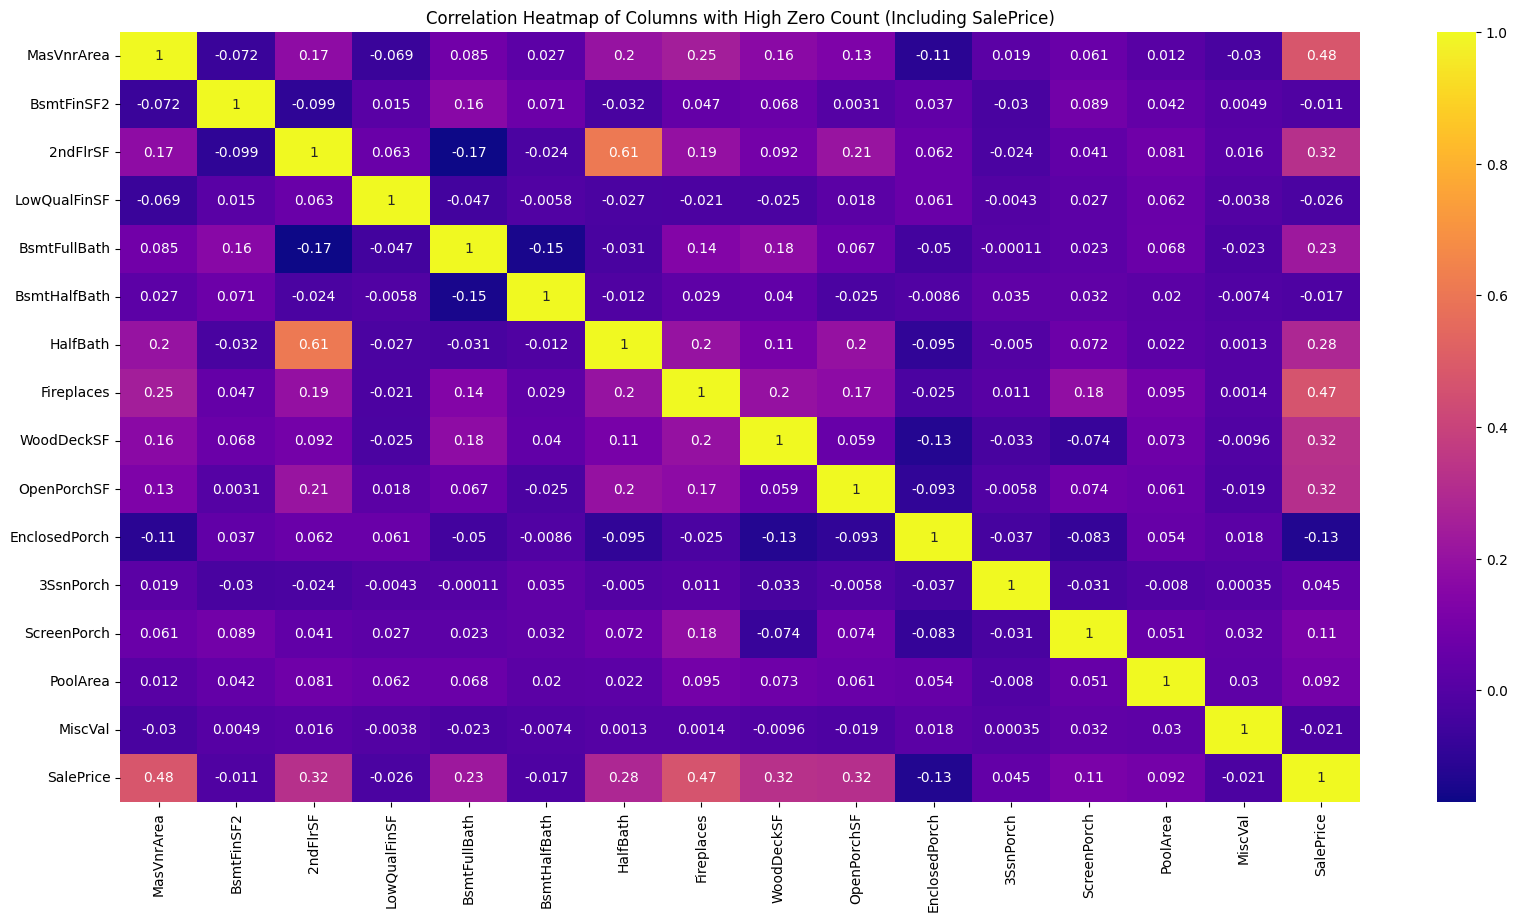

In [13]:
correlation = numeric_df.corr()['SalePrice']

plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df[dropp + ['SalePrice']].corr(), annot=True, cmap='plasma')
plt.title('Correlation Heatmap of Columns with High Zero Count (Including SalePrice)')
plt.show()

In [14]:
columns_to_drop = ['BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
                   'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','2ndFlrSF','HalfBath']

df = df.drop(columns_to_drop, axis=1)

In [15]:
# We will deal with nan values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)
missing_values

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


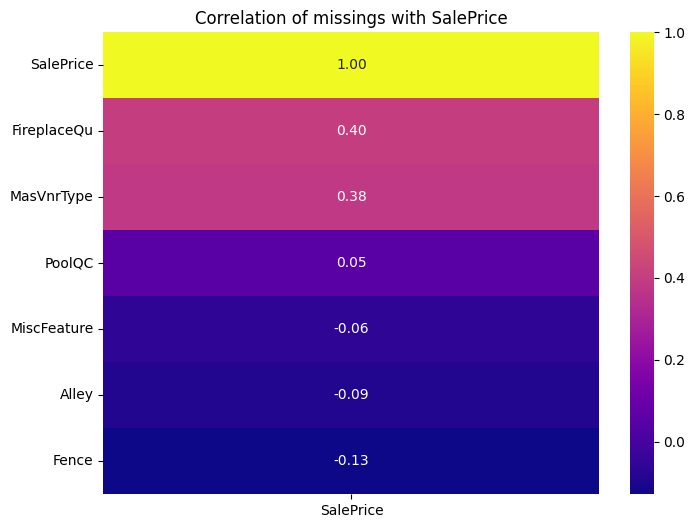

In [16]:
# We need to identify features with more than 40% missing values to determine which ones should be dropped from the dataset
features_of_interest = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'SalePrice']
df_subset = df[features_of_interest]

df_subset_encoded = df_subset.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

corr_matrix = df_subset_encoded.corr()

corr_with_saleprice = corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_saleprice, annot=True, fmt='.2f', cmap='plasma', cbar=True)
plt.title('Correlation of missings with SalePrice')
plt.show()

In [17]:
def null_percent(df):
    percent_null = 100 * df.isnull().sum() / len(df)
    percent_null = percent_null[percent_null > 0].sort_values()
    return percent_null

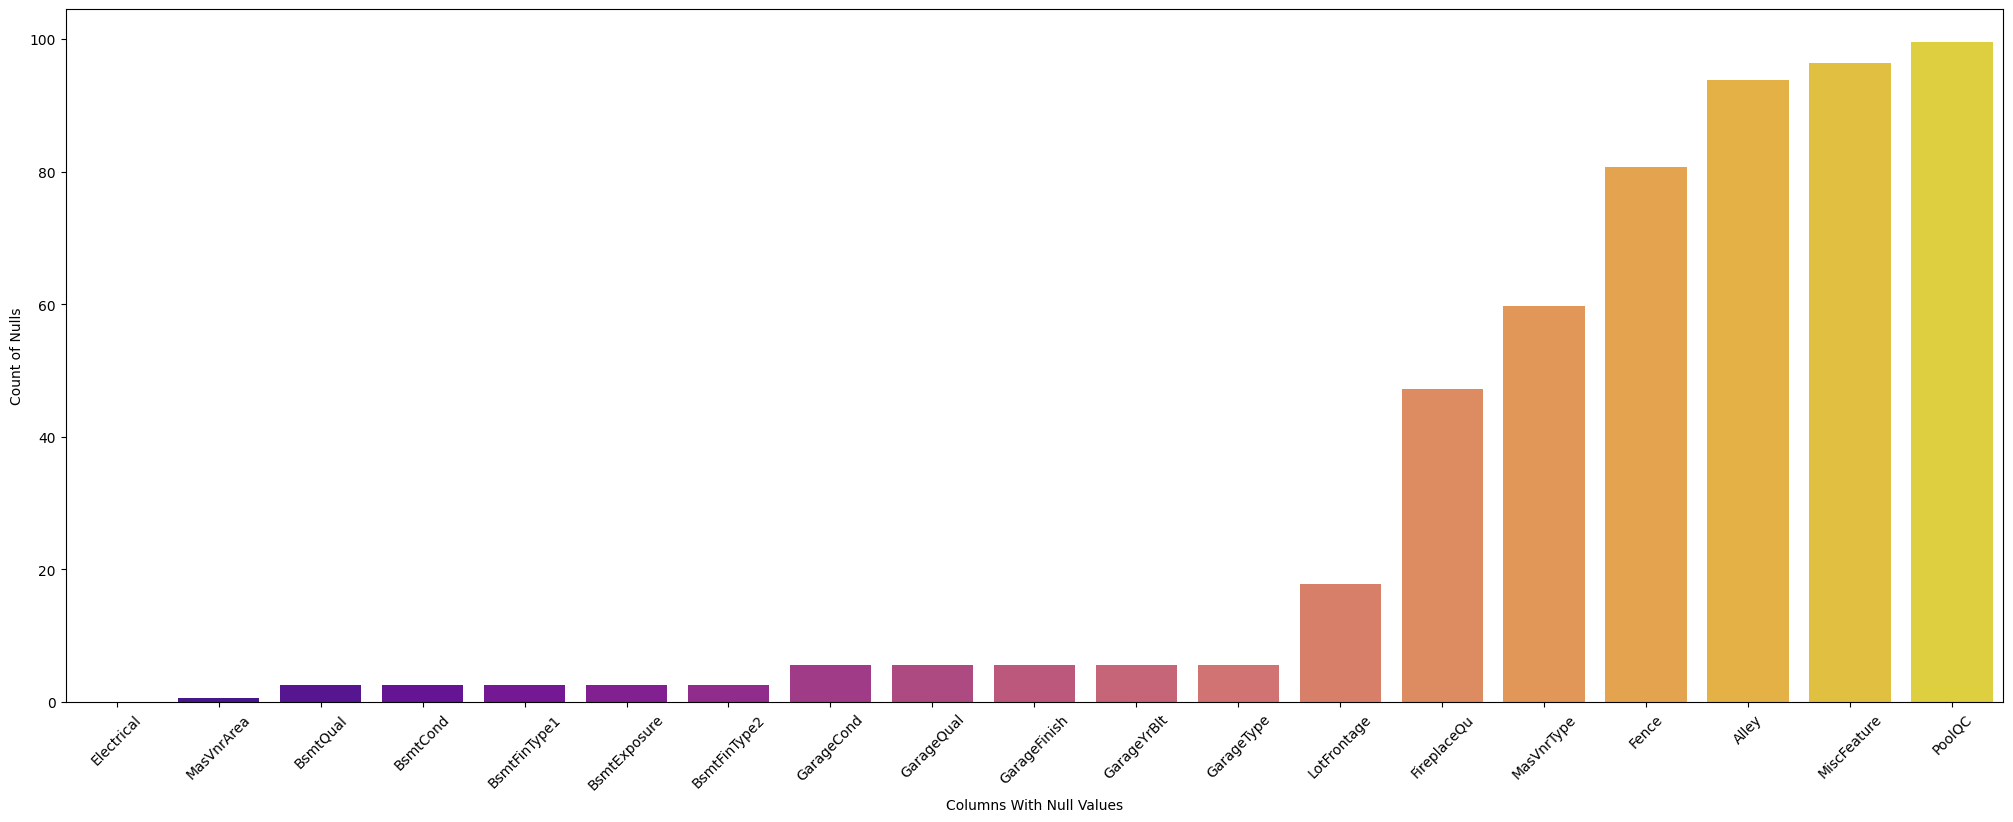

In [18]:
nulls = null_percent(df=df)
plt.figure(figsize=(25,9))
sns.barplot(x=nulls.index, y=nulls, palette="plasma")
plt.xlabel("Columns With Null Values")
plt.ylabel("Count of Nulls")
plt.xticks(rotation = 45);
plt.show();

In [19]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,567.240411,1057.429452,1162.626712,1515.463699,1.565068,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,441.866955,438.705324,386.587738,525.480383,0.550916,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,1129.500000,1.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,1464.000000,2.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,1776.750000,2.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,5642.000000,3.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,12.000000,2010.000000,755000.000000


In [20]:
df.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [21]:
df.duplicated().sum()

0

In [22]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [23]:
print(f"Numerical_Columns: {numeric_cols} and they are {len(numeric_cols)} ")

Numerical_Columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SalePrice'] and they are 25 


In [24]:
print(f"Categorical Columns: {categorical_cols} and they are {len(categorical_cols)}")

Categorical Columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] and they are 43


In [25]:
threshold = 0.4 * len(df)

# Find columns where the number of nulls is more than 50% then drop them
columns_with_high_nulls = [col for col in df.columns if df[col].isna().sum() > threshold]
columns_with_high_nulls

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [26]:
df = df.drop(columns_with_high_nulls, axis=1)

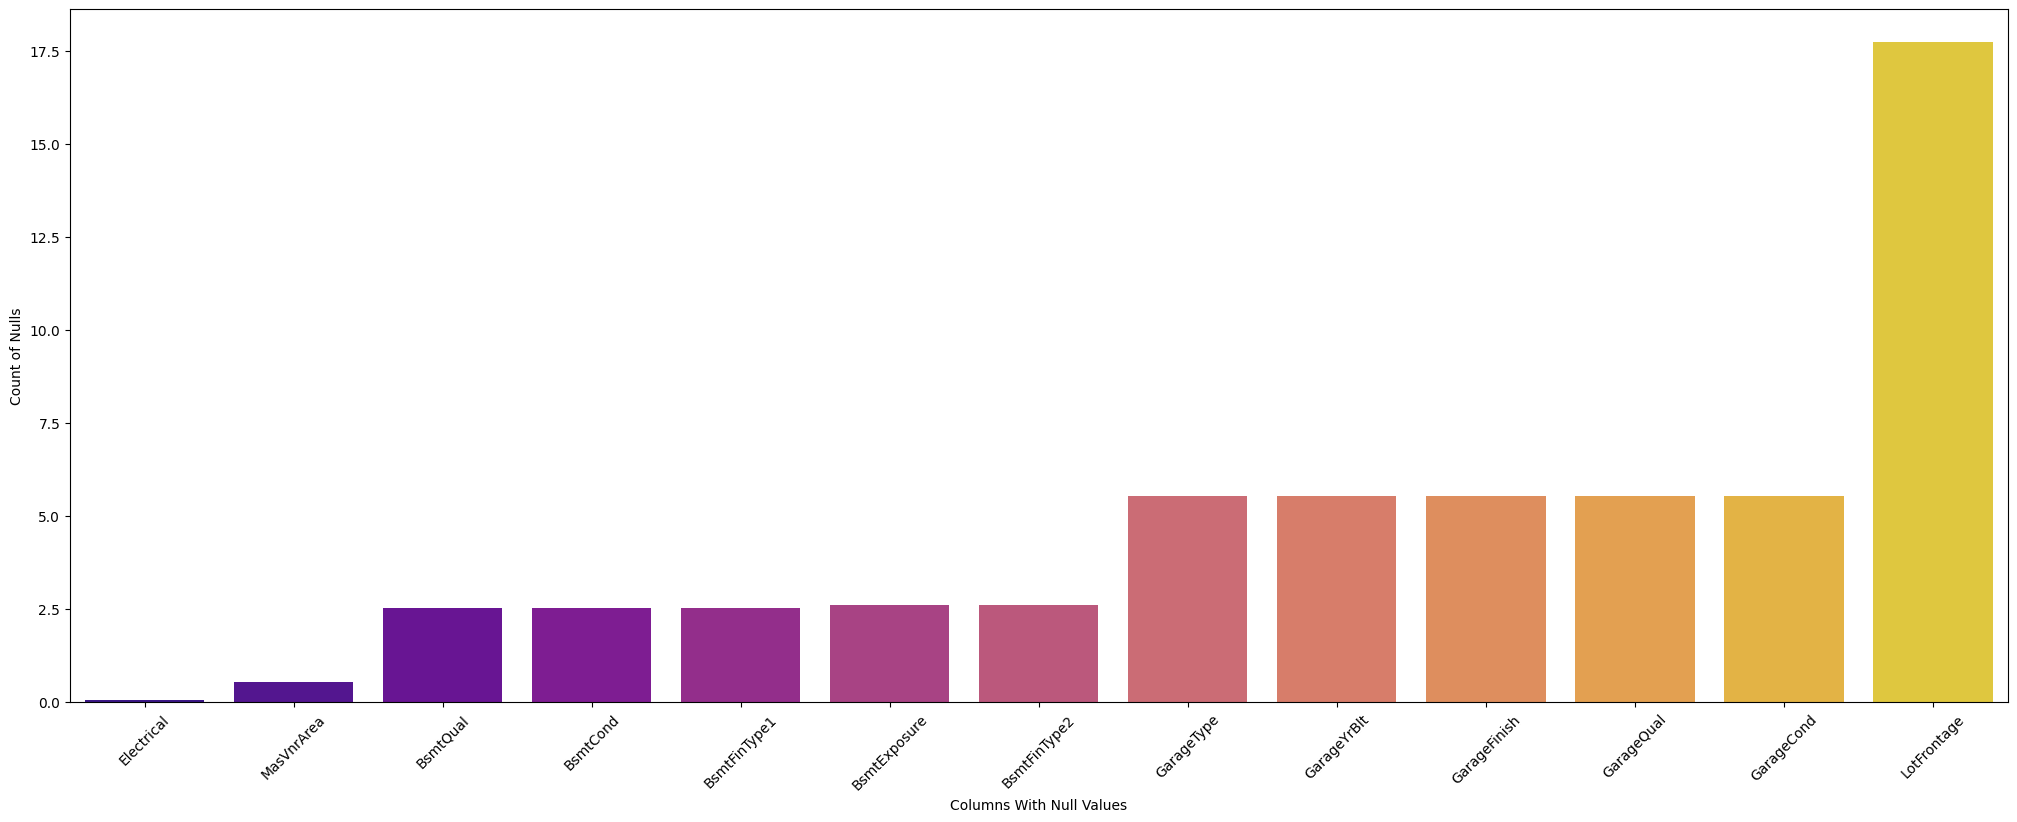

In [27]:
nulls = null_percent(df=df)
plt.figure(figsize=(25,9))
sns.barplot(x=nulls.index, y=nulls, palette="plasma")
plt.xlabel("Columns With Null Values")
plt.ylabel("Count of Nulls")
plt.xticks(rotation = 45);
plt.show();


In [28]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,384,384,GasA,Gd,Y,NaN,754,1394,2,3,1,Gd,7,Typ,0,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,5,2008,WD,Normal,167500


In [29]:
df = df.drop(1379,axis=0)

In [30]:
df[df['BsmtQual'].isnull() ].index == df[df['BsmtCond'].isnull() ].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [32]:
df = df.drop(df[df['BsmtCond'].isnull() ].index)

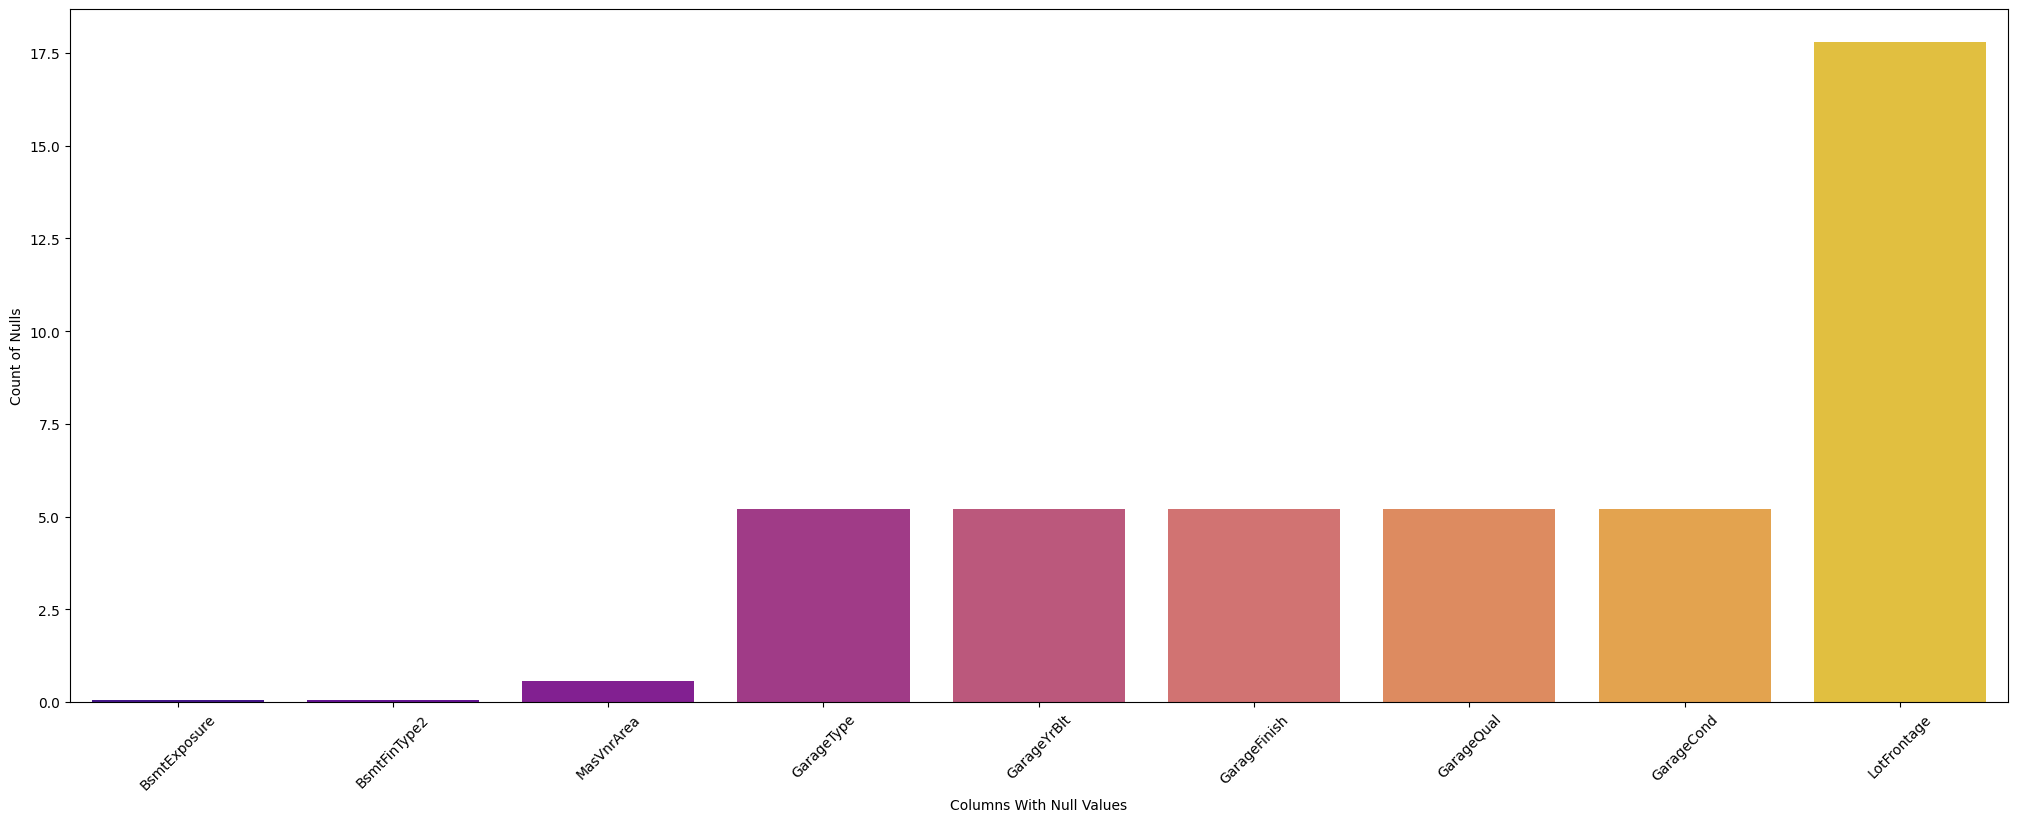

In [33]:
nulls = null_percent(df=df)
plt.figure(figsize=(25,9))
sns.barplot(x=nulls.index, y=nulls, palette="plasma")
plt.xlabel("Columns With Null Values")
plt.ylabel("Count of Nulls")
plt.xticks(rotation = 45);
plt.show();

In [34]:
df = df.drop(df[df['GarageType'].isnull() ].index)

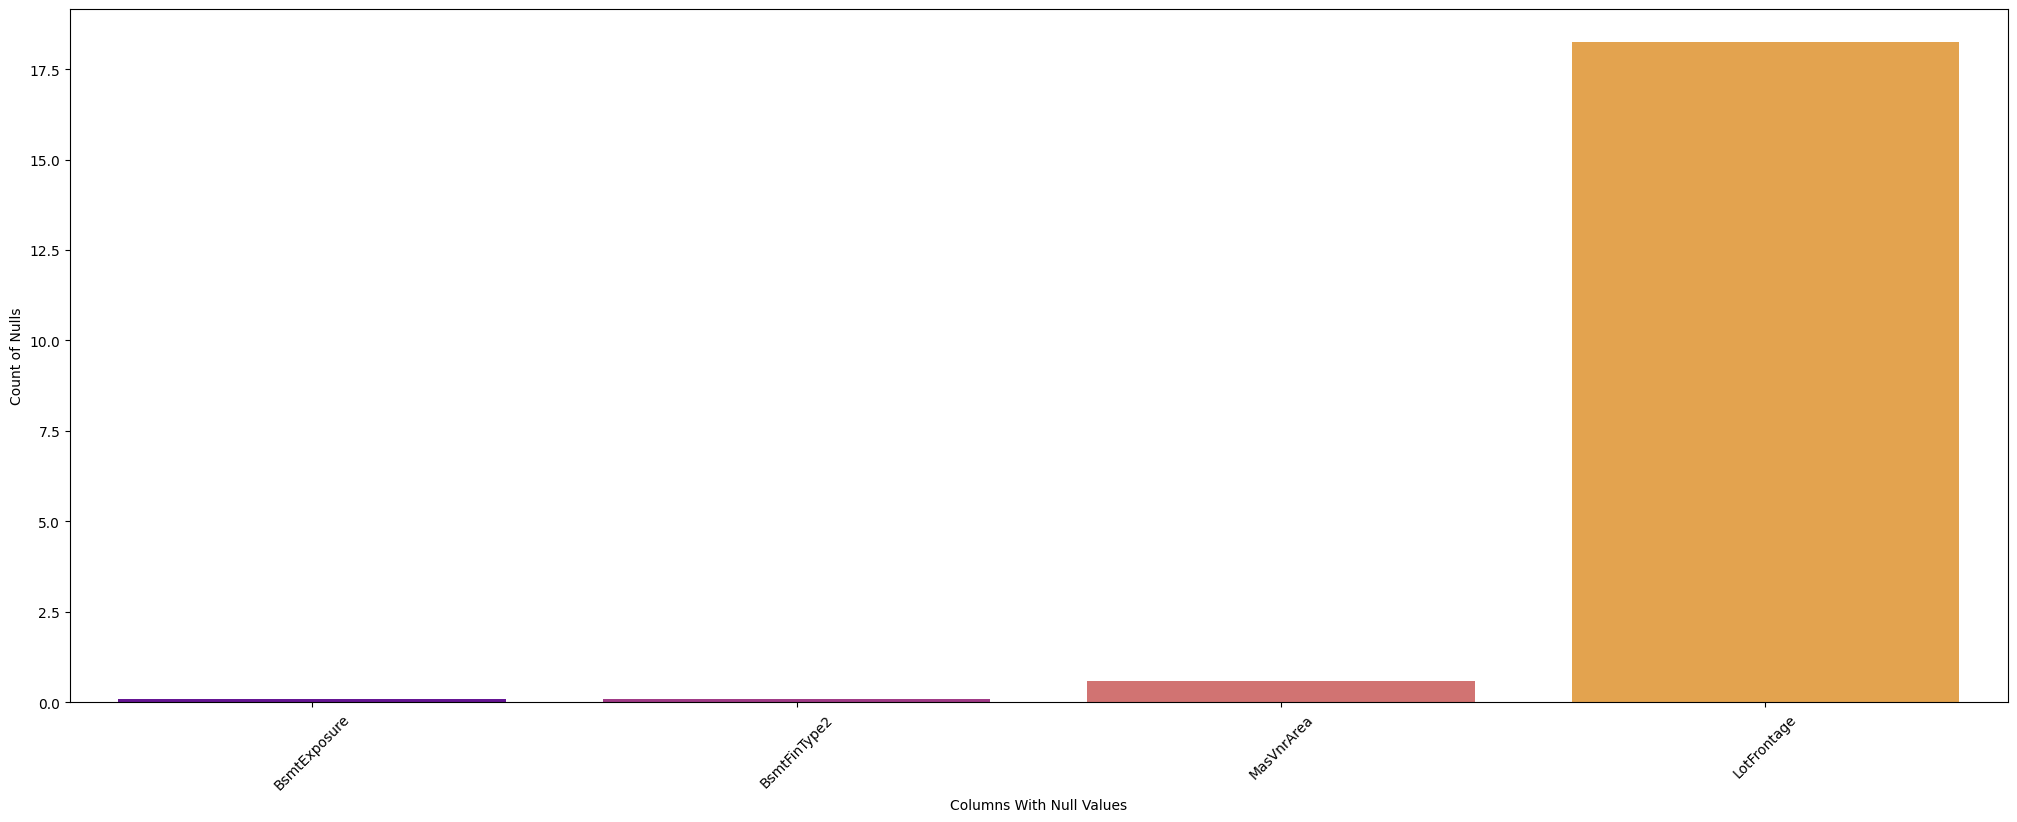

In [35]:
nulls = null_percent(df=df)
plt.figure(figsize=(25,9))
sns.barplot(x=nulls.index, y=nulls, palette="plasma")
plt.xlabel("Columns With Null Values")
plt.ylabel("Count of Nulls")
plt.xticks(rotation = 45);
plt.show();

In [36]:
df = df.drop(df[df['BsmtExposure'].isnull() ].index)
df = df.drop(df[df['BsmtFinType2'].isnull() ].index)

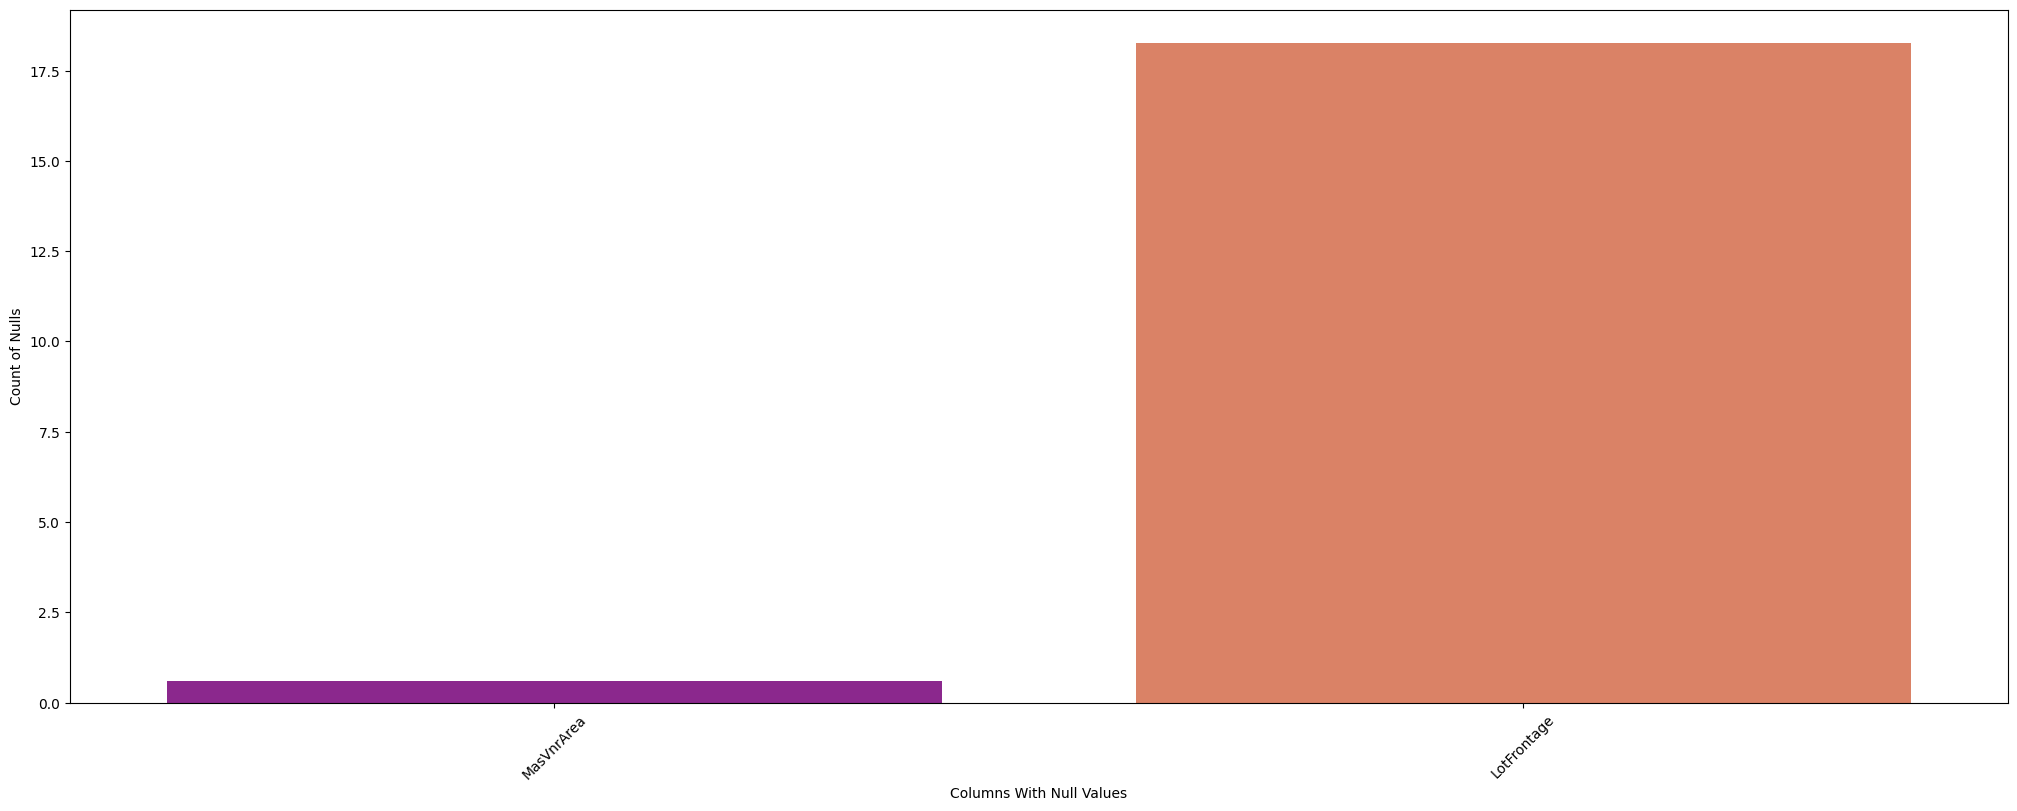

In [37]:
nulls = null_percent(df=df)
plt.figure(figsize=(25,9))
sns.barplot(x=nulls.index, y=nulls, palette="plasma")
plt.xlabel("Columns With Null Values")
plt.ylabel("Count of Nulls")
plt.xticks(rotation = 45);
plt.show();

In [38]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [39]:
df['MasVnrArea']

,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0
...,...
1455,0.0
1456,119.0
1457,0.0
1458,0.0


In [40]:
df[df['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,70.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,235,860,GasA,Ex,Y,SBrkr,860,1960,2,4,1,Gd,8,Typ,2,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,5,2010,WD,Normal,216500
529,530,20,RL,70.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,816,2035,GasA,TA,Y,SBrkr,2515,2515,3,4,2,TA,9,Maj1,2,Attchd,1975.0,RFn,2,484,TA,TA,Y,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,813,813,GasA,Ex,Y,SBrkr,822,1665,2,3,1,Gd,7,Typ,0,Attchd,2007.0,RFn,2,562,TA,TA,Y,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,343,1176,GasA,Ex,Y,SBrkr,1200,1200,2,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2,555,TA,TA,Y,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,1428,1428,GasA,Ex,Y,SBrkr,1428,1428,2,3,1,Gd,6,Typ,0,Attchd,2007.0,Fin,2,480,TA,TA,Y,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,135,1241,GasA,Ex,Y,SBrkr,1241,1241,1,1,1,Gd,4,Typ,0,Attchd,2007.0,Fin,2,569,TA,TA,Y,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,690,2076,GasA,Ex,Y,SBrkr,2076,2076,2,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3,850,TA,TA,Y,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,324,1128,GasA,Ex,Y,SBrkr,1128,2031,2,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,577,TA,TA,Y,3,2008,WD,Normal,237000


In [41]:
df['MasVnrArea'] =df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [42]:
nulls = null_percent(df=df)

if not nulls.empty:
    plt.figure(figsize=(25,9))
    sns.barplot(x=nulls.index, y=nulls, palette="plasma")
    plt.xlabel("Columns With Null Values")
    plt.ylabel("Count of Nulls")
    plt.show()
else:
    print("No null values found in the DataFrame.")

No null values found in the DataFrame.


In [43]:
df = df.drop('Id',axis=1)

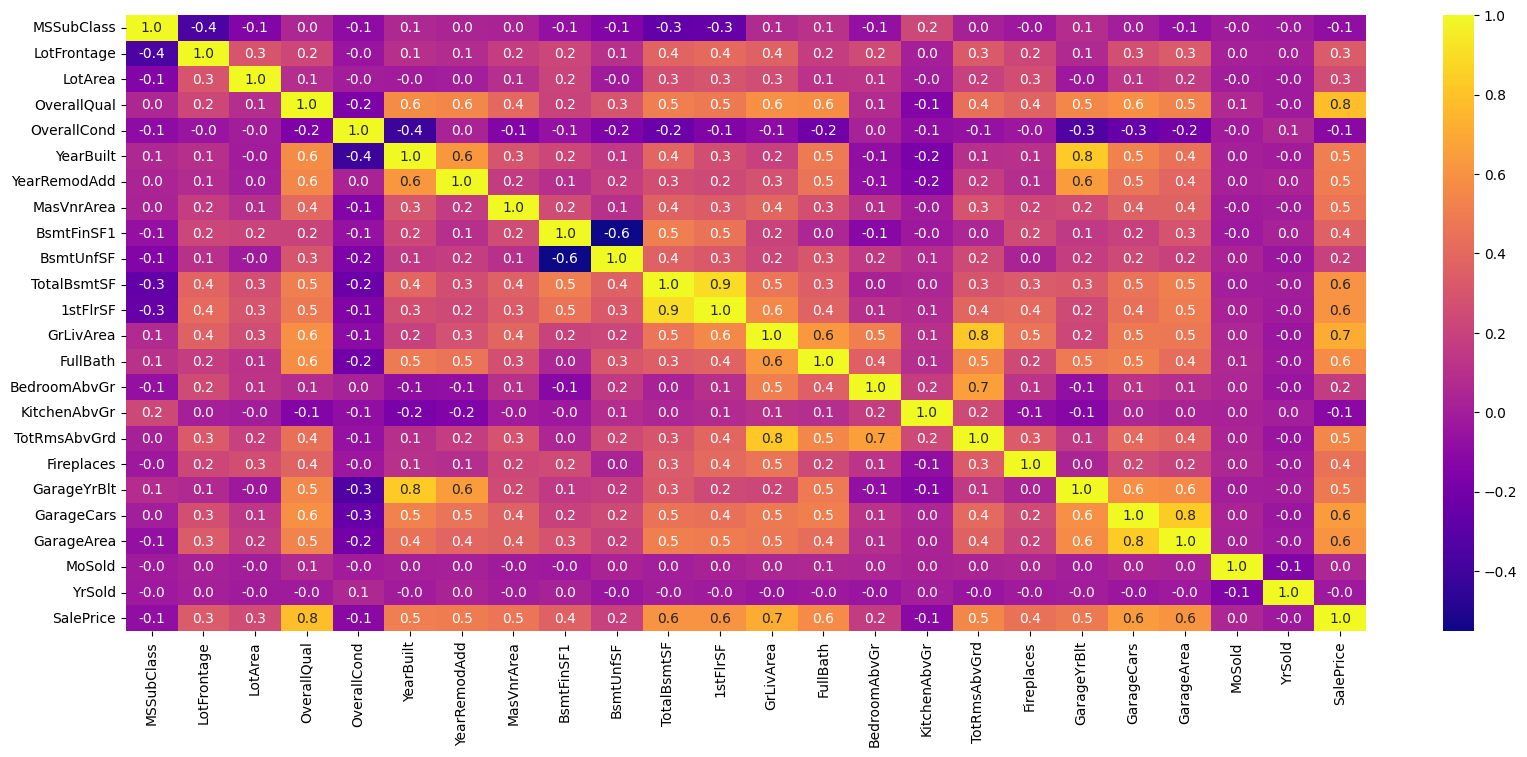

In [44]:
# correlations of features
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
plt.figure(figsize = (20,8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True,cmap='plasma',fmt='.1f')
plt.show()

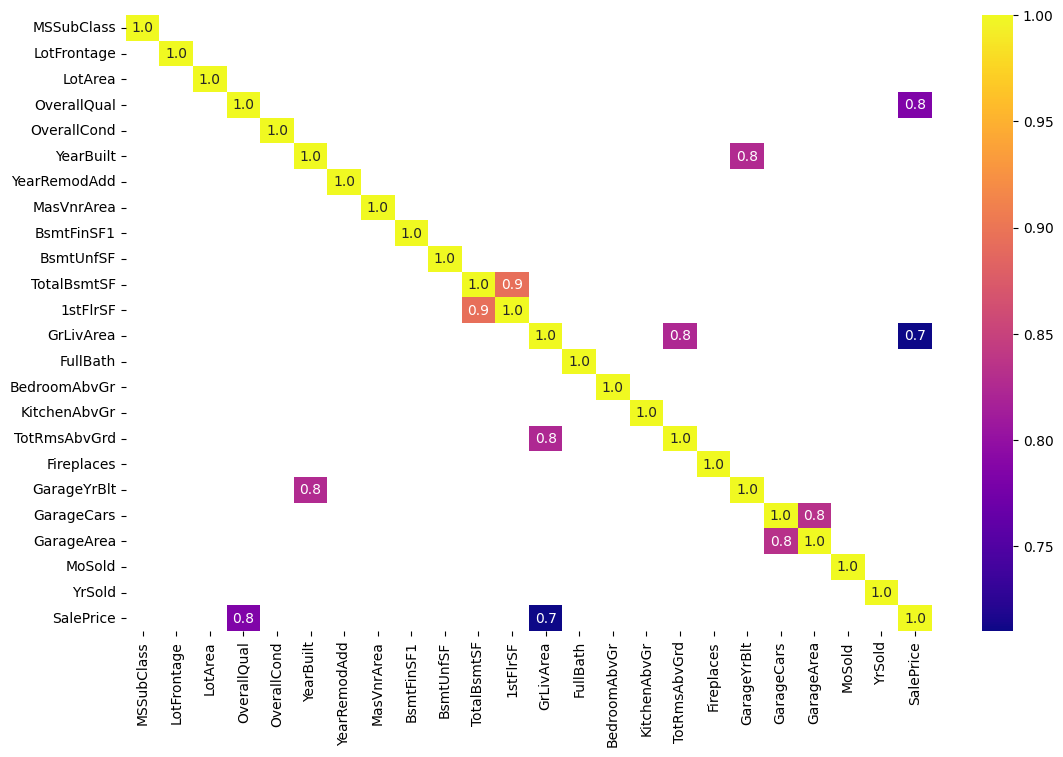

In [45]:
# Filter the matrix to show only correlations >= 0.7 or <= -0.7
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize = (13,8))
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]
sns.heatmap(filtered_corr_matrix, annot=True,cmap='plasma',fmt='.1f')
plt.show()

In [46]:
#To Overcome multicollinearity
df = df.drop(columns=["GarageYrBlt",'TotRmsAbvGrd','1stFlrSF','YearBuilt','YearRemodAdd'],axis=1)

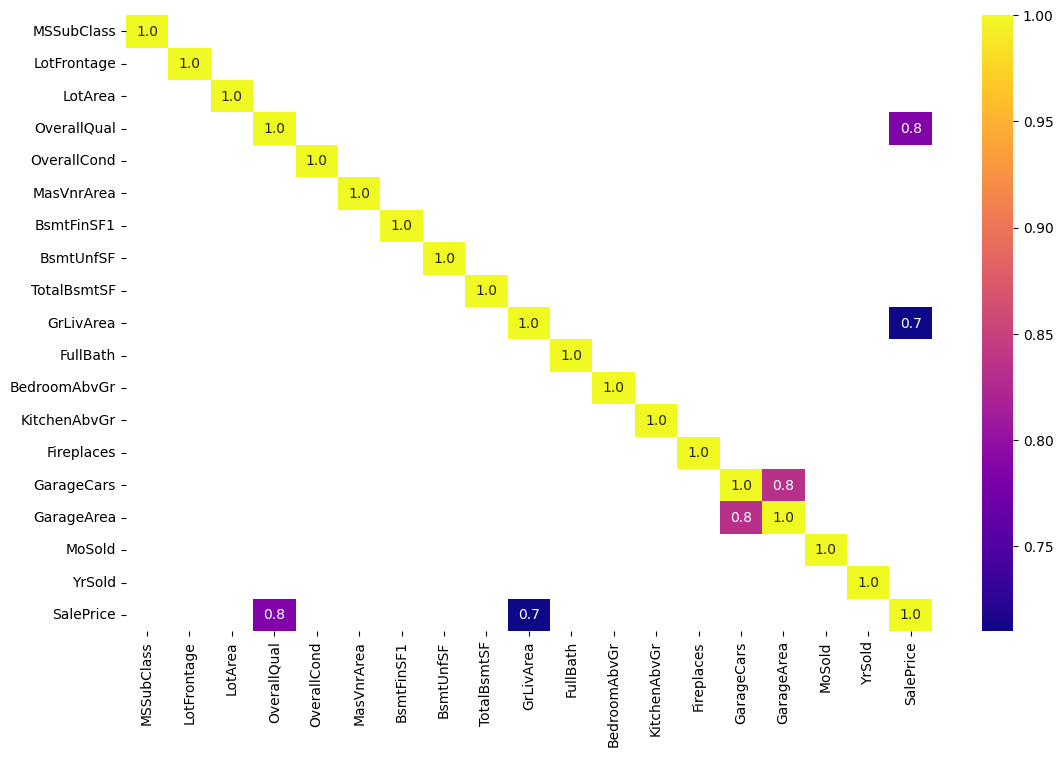

In [47]:
# Filter the matrix to show only correlations >= 0.7 or <= -0.7
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize = (13,8))
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]
sns.heatmap(filtered_corr_matrix, annot=True,cmap='plasma',fmt='.1f')
plt.show()

In [48]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=df["OverallQual"],
    y=df["SalePrice"],
    mode='markers',
    marker=dict(size=10, color='blue')
))
fig.update_layout(
    title='Scatter Plot of Sale Price vs. Overall Quality',
    xaxis_title='Overall Quality',
    yaxis_title='Sale Price',
    width=800,
    height=600
)


fig.show()

In [49]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [50]:
df['TotalBsmtSF']

,TotalBsmtSF
0,856
1,1262
2,920
3,756
4,1145
...,...
1455,953
1456,1542
1457,1152
1458,1078


In [51]:
df['TotalArea'] = df['TotalBsmtSF'] + df['GrLivArea']

In [52]:
df['QualityConditionScore'] = df['OverallQual'] * df['OverallCond']

In [53]:
df['TotalSqFt'] = df['GrLivArea'] + df['TotalBsmtSF']

In [54]:
df['BsmtAreaRatio'] = df['TotalBsmtSF'] / df['GrLivArea']

In [55]:
df['Qual_Area'] = df['OverallQual'] * df['GrLivArea']

In [56]:
df['TotalArea_Qual'] = df['TotalArea'] * df['OverallQual']

In [57]:
df['OverallQual_GrLivArea'] = df['OverallQual'] * df['GrLivArea']

In [58]:
df['TotalArea_Cond'] = df['TotalArea'] * df['OverallCond']

In [59]:
df['Bsmt_Area'] = df['TotalBsmtSF'] * df['OverallCond']

In [60]:
df['GarageCars_OverallQual'] = df['GarageCars'] * df['OverallQual']

In [61]:
df  = df.drop(['TotalBsmtSF','GrLivArea', 'OverallQual','OverallCond','GrLivArea','TotalBsmtSF','GrLivArea','YrSold','TotalArea','OverallQual','GrLivArea','GarageCars'],axis=1)

In [62]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition,SalePrice,QualityConditionScore,TotalSqFt,BsmtAreaRatio,Qual_Area,TotalArea_Qual,OverallQual_GrLivArea,TotalArea_Cond,Bsmt_Area,GarageCars_OverallQual
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,GasA,Ex,Y,SBrkr,2,3,1,Gd,Typ,0,Attchd,RFn,548,TA,TA,Y,2,WD,Normal,208500,35,2566,0.500585,11970,17962,11970,12830,4280,14
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,GasA,Ex,Y,SBrkr,2,3,1,TA,Typ,1,Attchd,RFn,460,TA,TA,Y,5,WD,Normal,181500,48,2524,1.000000,7572,15144,7572,20192,10096,12
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,GasA,Ex,Y,SBrkr,2,3,1,Gd,Typ,1,Attchd,RFn,608,TA,TA,Y,9,WD,Normal,223500,35,2706,0.515118,12502,18942,12502,13530,4600,14
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,GasA,Gd,Y,SBrkr,1,3,1,Gd,Typ,1,Detchd,Unf,642,TA,TA,Y,2,WD,Abnorml,140000,35,2473,0.440303,12019,17311,12019,12365,3780,21
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,GasA,Ex,Y,SBrkr,2,4,1,Gd,Typ,1,Attchd,RFn,836,TA,TA,Y,12,WD,Normal,250000,40,3343,0.520928,17584,26744,17584,16715,5725,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,953,GasA,Ex,Y,SBrkr,2,3,1,TA,Typ,1,Attchd,RFn,460,TA,TA,Y,8,WD,Normal,175000,30,2600,0.578628,9882,15600,9882,13000,4765,12
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,589,GasA,TA,Y,SBrkr,2,3,1,TA,Min1,2,Attchd,Unf,500,TA,TA,Y,2,WD,Normal,210000,36,3615,0.743849,12438,21690,12438,21690,9252,12
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,877,GasA,Ex,Y,SBrkr,2,4,1,Gd,Typ,2,Attchd,RFn,252,TA,TA,Y,5,WD,Normal,266500,63,3492,0.492308,16380,24444,16380,31428,10368,7
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,0,GasA,Gd,Y,FuseA,1,2,1,Gd,Typ,0,Attchd,Unf,240,TA,TA,Y,4,WD,Normal,142125,30,2156,1.000000,5390,10780,5390,12936,6468,5


<Axes: >

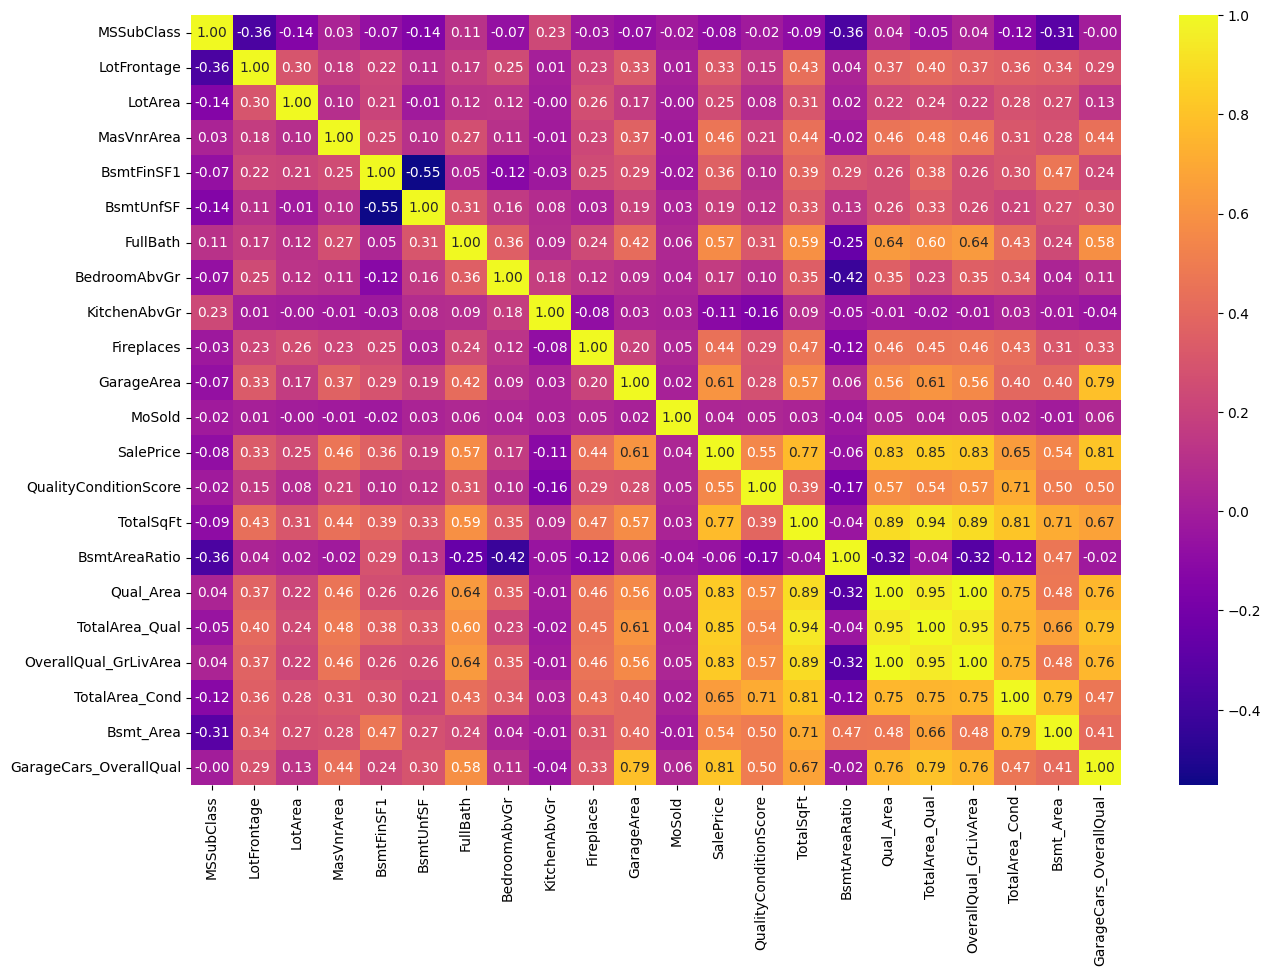

In [63]:
numeric_cols = df.select_dtypes(include=['number']).columns

corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True,cmap='plasma',fmt='.2f')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MSSubClass              1346 non-null   int64  
 1   MSZoning                1346 non-null   object 
 2   LotFrontage             1346 non-null   float64
 3   LotArea                 1346 non-null   int64  
 4   Street                  1346 non-null   object 
 5   LotShape                1346 non-null   object 
 6   LandContour             1346 non-null   object 
 7   Utilities               1346 non-null   object 
 8   LotConfig               1346 non-null   object 
 9   LandSlope               1346 non-null   object 
 10  Neighborhood            1346 non-null   object 
 11  Condition1              1346 non-null   object 
 12  Condition2              1346 non-null   object 
 13  BldgType                1346 non-null   object 
 14  HouseStyle              1346 non-null   objec

In [65]:
df_obj = df.select_dtypes(include='object')
df_obj.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [66]:
print(df_obj.value_counts())

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  SaleCondition
RL        Pave    Reg       Lvl          AllPub     Inside     Gtl        CollgCr       Norm        Norm        1Fam      2Story      Gable      CompShg   VinylSd      VinylSd      Gd         TA         PConc       Gd        TA        No            GLQ           Unf           GasA     Ex         Y           SBrkr       Gd           Typ         Attchd      RFn           TA          TA          Y           WD        Normal           7
                                                                                                                          1Story   

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ordinal_columns =  [
    'ExterQual', 'ExterCond', 'BsmtFinType1', 'BsmtFinType2',
    'HeatingQC', 'KitchenQual', 'Functional', 'GarageFinish']

for col in ordinal_columns:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

In [68]:
# nominal columns to be one-hot encoded
nominal_columns = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
    'SaleCondition'
]
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

In [69]:
df.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtUnfSF,HeatingQC,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageArea,MoSold,SalePrice,QualityConditionScore,TotalSqFt,BsmtAreaRatio,Qual_Area,TotalArea_Qual,OverallQual_GrLivArea,TotalArea_Cond,Bsmt_Area,GarageCars_OverallQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,Heating_GasW,Heating_Grav,Heating_OthW,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_1,GarageFinish_2,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,196.0,2,3,706,150,0,2,3,1,2,6,0,548,2,208500,35,2566,0.500585,11970,17962,11970,12830,4280,14,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,...,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,0.0,3,3,978,284,0,2,3,1,3,6,1,460,5,181500,48,2524,1.000000,7572,15144,7572,20192,10096,12,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,162.0,2,3,486,434,0,2,3,1,2,6,1,608,9,223500,35,2706,0.515118,12502,18942,12502,13530,4600,14,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,0.0,3,3,216,540,2,1,3,1,2,6,1,642,2,140000,35,2473,0.440303,12019,17311,12019,12365,3780,21,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,350.0,2,3,655,490,0,2,4,1,2,6,1,836,12,250000,40,3343,0.520928,17584,26744,17584,16715,5725,24,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,Fal

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Columns: 196 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(169), float64(3), int64(24)
memory usage: 516.6 KB


In [71]:
y = df['SalePrice']
x = df.drop('SalePrice',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [72]:
y.shape

(1346,)

In [73]:
X_train.shape

(942, 195)

In [74]:
y_train.shape

(942,)

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression()

In [77]:
pred = model.predict(X_test)
pred.shape

(404,)

In [78]:
X_test.shape

(404, 195)

In [80]:
y_pred=model.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

70680.88998137976


In [81]:
r2 = r2_score(y_test,pred)
r2

0.11047198924280277

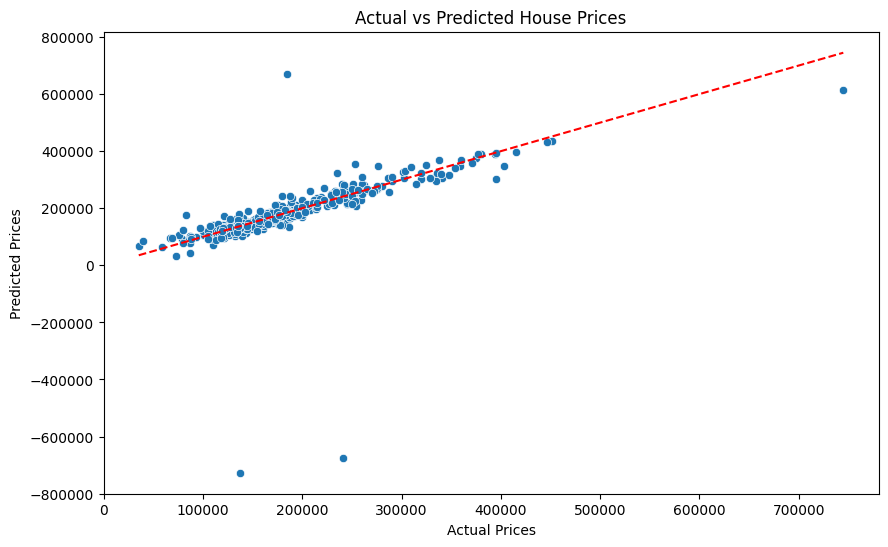

In [82]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))

sns.scatterplot(x = y_test, y=pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.show()

In [83]:
correlations = X_train.corrwith(y_train).abs()
most_correlated_feature = correlations.idxmax()
most_correlated_feature

'TotalArea_Qual'

In [84]:
print(f"Most correlated feature: {most_correlated_feature}")

Most correlated feature: TotalArea_Qual


In [85]:
X_train_most_corr = X_train[[most_correlated_feature]]
X_test_most_corr = X_test[[most_correlated_feature]]

In [86]:
model = LinearRegression()
model.fit(X_train_most_corr, y_train)

LinearRegression()

In [87]:
y_train_pred = model.predict(X_train_most_corr)
y_test_pred = model.predict(X_test_most_corr)

In [88]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [89]:
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 42806.3960
Test RMSE: 39809.5196


In [90]:
r2 = r2_score(y_test,y_test_pred)
r2

0.7178178851874113

In [91]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

lasso_train_pred = lasso.predict(X_train)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
print(f"Lasso Training RMSE: {lasso_train_rmse:.4f}")

lasso_test_pred = lasso.predict(X_test)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
print(f"Lasso Test RMSE: {lasso_test_rmse:.4f}")

Lasso Training RMSE: 19061.2885
Lasso Test RMSE: 69995.4232


In [92]:
r2 = r2_score(y_test,lasso_test_pred)
r2

0.12764169977486584

In [93]:
ridge = Ridge()
ridge.fit(X_train, y_train)

ridge_train_pred = ridge.predict(X_train)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
print(f"Ridge Training RMSE: {ridge_train_rmse:.4f}")

ridge_test_pred = ridge.predict(X_test)
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
print(f"Ridge Test RMSE: {ridge_test_rmse:.4f}")

Ridge Training RMSE: 23534.5781
Ridge Test RMSE: 32485.6314


In [94]:
r2 = r2_score(y_test, ridge_test_pred)
r2

0.812095044372348

In [95]:
degree = 2
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Polynomial Regression (degree {degree}) Training RMSE: {train_rmse:.4f}")


test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Polynomial Regression (degree {degree}) Test RMSE: {test_rmse:.4f}")

Polynomial Regression (degree 2) Training RMSE: 0.0000
Polynomial Regression (degree 2) Test RMSE: 317795.6966


In [96]:
r2 = r2_score(y_test,  y_test_pred)
r2

-16.982564791106363